In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/breast_cancer.csv')

In [3]:
#highly correlated columns to remove
to_drop = ['worst radius', 'worst texture', 'worst perimeter', 'worst area','worst concave points','mean concave points','radius error','area error','mean radius','mean perimeter']
df.drop(to_drop,axis=1,inplace=True)

In [4]:
## Independent and dependent features
X = df.drop('target',axis=1)
y = df['target']

In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    1
565    0
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [6]:
#rectifying target imbalance
from imblearn.combine import SMOTETomek

resampler = SMOTETomek(sampling_strategy="auto")
X , y = resampler.fit_resample(X, y)

In [7]:
X[y==1].shape , X[y==0].shape

((340, 20), (340, 20))

In [8]:
#All features in X are numerical in nature
numerical_cols = X.columns
numerical_cols

Index(['mean texture', 'mean area', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'perimeter error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

In [9]:
# since all the features are only numerical in nature creating only numerical pipeline
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [10]:
numerical_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline , numerical_cols)
])

In [11]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [12]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [13]:
X_train.shape , X_test.shape

((476, 20), (204, 20))

In [14]:
X_train.head()

,numerical_pipeline__mean texture,numerical_pipeline__mean area,numerical_pipeline__mean smoothness,numerical_pipeline__mean compactness,numerical_pipeline__mean concavity,numerical_pipeline__mean symmetry,numerical_pipeline__mean fractal dimension,numerical_pipeline__texture error,numerical_pipeline__perimeter error,numerical_pipeline__smoothness error,numerical_pipeline__compactness error,numerical_pipeline__concavity error,numerical_pipeline__concave points error,numerical_pipeline__symmetry error,numerical_pipeline__fractal dimension error,numerical_pipeline__worst smoothness,numerical_pipeline__worst compactness,numerical_pipeline__worst concavity,numerical_pipeline__worst symmetry,numerical_pipeline__worst fractal dimension
0,-2.101730,-0.214386,0.884424,-0.014630,-0.164745,0.087395,0.178019,-0.670470,-0.597951,-1.071332,-0.782494,-0.153796,-0.048593,-0.135253,-0.399680,-0.150709,-0.582651,-0.212817,-0.060344,-0.280087
1,1.314436,-0.018389,0.201989,-0.217767,0.114230,-0.624785,0.232707,0.236984,0.247917,0.724560,-0.199041,0.344248,0.542307,-0.068428,0.282150,1.100583,-0.113139,0.448202,-0.309504,0.563665
2,2.635305,-0.432857,-0.363544,-0.674533,-0.877544,-1.662122,-0.381203,1.337072,-0.427267,-0.411875,-0.800281,-0.841565,-0.523847,-0.566605,-0.327881,-0.763802,-0.820791,-1.088899,-1.218821,-0.467890
3,-0.295781,-0.824798,-0.292838,-0.940234,-0.898965,0.007375,-0.500001,-0.696999,-0.238516,-0.236172,-0.907594,-0.692906,-0.516070,0.340980,-0.946077,-0.715972,-1.062174,-1.036985,-0.309425,-1.141938
4,-2.383611,-0.955096,-0.116779,-0.987449,-0.911628,-1.640298,0.175121,-1.518266,-0.979256,0.229652,-0.957041,-0.740988,-1.150018,-0.953077,-0.678760,0.384118,-0.927207,-0.925573,-1.396019,-0.454273


In [15]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components=X_train.shape[1])
covar_matrix.fit(X_train)

PCA(n_components=20)

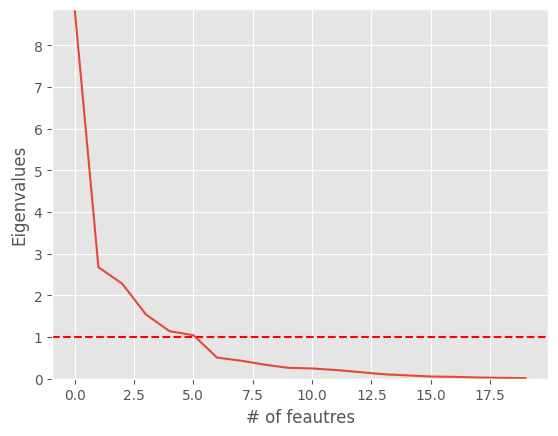

In [16]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") 
plt.ylabel('Eigenvalues')
plt.xlabel('# of feautres')
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.axhline(y=1,color = 'r' , linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

In [17]:
# pca = PCA(n_components=5)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [18]:
# pca.explained_variance_ratio_*100

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import  accuracy_score , roc_auc_score , f1_score

In [20]:
# a function to evaluate the model
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    roc_score = roc_auc_score(true, predicted)
    f_1_score = f1_score(true, predicted)

    return accuracy , roc_score , f_1_score

In [21]:
models={
    'LogisticRegression':LogisticRegression(),
    'RidgeClassifier':RidgeClassifier(),
    'BernoulliNB':BernoulliNB(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVC':SVC(),
    'XGBClassifier':XGBClassifier()
}
model_list=[]
roc=[]
acc = []
f1 = []
performance = []
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    accuracy , roc_score  , f_1_score =evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    roc.append(roc_score)
    acc.append(accuracy)
    f1.append(f_1_score)
    performance.append((list(models.keys())[i] , accuracy ))


    print('Model Training Performance')
    print("ROC:",roc_score)
    print("Accuracy:",accuracy)

    
    print('='*35)
    print('\n')

print("Best Model" , sorted(performance , key = lambda x: x[1])[-1])
model = models[sorted(performance , key = lambda x: x[1])[-1][0]]
print(model)

metrics = pd.DataFrame({"models": model_list , "accuracy" : acc , "roc_auc_score": roc , "f1_score" : f1})
print(metrics.sort_values('accuracy',ascending=False))


LogisticRegression
Model Training Performance
ROC: 0.9821428571428572
Accuracy: 0.9803921568627451


RidgeClassifier
Model Training Performance
ROC: 0.9802018633540373
Accuracy: 0.9803921568627451


BernoulliNB
Model Training Performance
ROC: 0.8623835403726708
Accuracy: 0.8627450980392157


DecisionTreeClassifier
Model Training Performance
ROC: 0.9351708074534161
Accuracy: 0.9362745098039216


KNeighborsClassifier
Model Training Performance
ROC: 0.9505046583850932
Accuracy: 0.9509803921568627


AdaBoostClassifier
Model Training Performance
ROC: 0.9811723602484472
Accuracy: 0.9803921568627451


GradientBoostingClassifier
Model Training Performance
ROC: 0.9757375776397514
Accuracy: 0.9754901960784313


BaggingClassifier
Model Training Performance
ROC: 0.9693322981366459
Accuracy: 0.9705882352941176


RandomForestClassifier
Model Training Performance
ROC: 0.9638975155279502
Accuracy: 0.9656862745098039


SVC
Model Training Performance
ROC: 0.9802018633540373
Accuracy: 0.9803921568627451
